In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

626

In [5]:
import requests
from config import weather_api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | itupiranga
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | maceio
Processing Record 6 of Set 1 | nanortalik
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | port macquarie
Processing Record 9 of Set 1 | tonantins
Processing Record 10 of Set 1 | fortuna
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | azangaro
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | kumba
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | serta
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | avera
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | vanino
Processing Record 23 of Set 1 | new 

Processing Record 36 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 37 of Set 4 | dumas
Processing Record 38 of Set 4 | kahului
Processing Record 39 of Set 4 | makaha
Processing Record 40 of Set 4 | talnakh
Processing Record 41 of Set 4 | atbasar
Processing Record 42 of Set 4 | verkhnevilyuysk
Processing Record 43 of Set 4 | kalbay
Processing Record 44 of Set 4 | tiksi
Processing Record 45 of Set 4 | fairbanks
Processing Record 46 of Set 4 | calnic
Processing Record 47 of Set 4 | black river
Processing Record 48 of Set 4 | seymchan
Processing Record 49 of Set 4 | ca mau
Processing Record 50 of Set 4 | necochea
Processing Record 1 of Set 5 | toora-khem
Processing Record 2 of Set 5 | gat
Processing Record 3 of Set 5 | nakonde
Processing Record 4 of Set 5 | ketchikan
Processing Record 5 of Set 5 | seoul
Processing Record 6 of Set 5 | panzhihua
Processing Record 7 of Set 5 | catuday
Processing Record 8 of Set 5 | iskateley
Processing Record 9 of Set 5 | mount gambier


Processing Record 24 of Set 8 | dovers
Processing Record 25 of Set 8 | leningradskiy
Processing Record 26 of Set 8 | takapau
Processing Record 27 of Set 8 | doctor arroyo
Processing Record 28 of Set 8 | itamaraca
Processing Record 29 of Set 8 | pitea
Processing Record 30 of Set 8 | peace river
Processing Record 31 of Set 8 | tyler
Processing Record 32 of Set 8 | kamloops
Processing Record 33 of Set 8 | jvari
Processing Record 34 of Set 8 | yamethin
Processing Record 35 of Set 8 | iqaluit
Processing Record 36 of Set 8 | biak
Processing Record 37 of Set 8 | mashhad
Processing Record 38 of Set 8 | rawson
Processing Record 39 of Set 8 | manta
Processing Record 40 of Set 8 | spencer
Processing Record 41 of Set 8 | quatre cocos
Processing Record 42 of Set 8 | constantine
Processing Record 43 of Set 8 | yaan
Processing Record 44 of Set 8 | xining
Processing Record 45 of Set 8 | dingle
Processing Record 46 of Set 8 | kaitangata
Processing Record 47 of Set 8 | kiama
Processing Record 48 of Set 

Processing Record 16 of Set 12 | oil city
Processing Record 17 of Set 12 | saint-francois
Processing Record 18 of Set 12 | kindersley
Processing Record 19 of Set 12 | eilenburg
Processing Record 20 of Set 12 | tumaco
Processing Record 21 of Set 12 | nakhon thai
Processing Record 22 of Set 12 | emerald
Processing Record 23 of Set 12 | gushikawa
Processing Record 24 of Set 12 | cabo san lucas
Processing Record 25 of Set 12 | amurrio
Processing Record 26 of Set 12 | nsanje
Processing Record 27 of Set 12 | wewak
Processing Record 28 of Set 12 | umm lajj
Processing Record 29 of Set 12 | pyay
Processing Record 30 of Set 12 | marfino
Processing Record 31 of Set 12 | angleton
Processing Record 32 of Set 12 | culiacan
Processing Record 33 of Set 12 | banda aceh
Processing Record 34 of Set 12 | lata
Processing Record 35 of Set 12 | leiyang
Processing Record 36 of Set 12 | ormara
Processing Record 37 of Set 12 | aurora
Processing Record 38 of Set 12 | kruisfontein
Processing Record 39 of Set 12 |

In [7]:
len(city_data)

575

In [8]:
# Convert the array of dictionaries into a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Itupiranga,-5.1347,-49.3267,89.60,62,40,6.91,BR,2021-01-29 17:00:46
1,Port Alfred,-33.5906,26.8910,70.00,81,0,1.99,ZA,2021-01-29 16:56:30
2,Jamestown,42.0970,-79.2353,21.00,86,90,16.11,US,2021-01-29 16:56:14
3,San Patricio,28.0170,-97.5169,69.80,64,1,10.36,US,2021-01-29 16:56:58
4,Maceio,-9.6658,-35.7353,75.20,88,75,1.14,BR,2021-01-29 16:58:03
5,Nanortalik,60.1432,-45.2371,35.40,83,100,9.66,GL,2021-01-29 16:56:18
6,Mataura,-46.1927,168.8643,48.00,80,32,8.01,NZ,2021-01-29 16:56:12
7,Port Macquarie,-31.4333,152.9167,71.60,100,75,3.44,AU,2021-01-29 17:00:47
8,Tonantins,-2.8731,-67.8022,85.37,73,73,4.05,BR,2021-01-29 17:00:47
9,Fortuna,40.5982,-124.1573,39.99,100,1,8.05,US,2021-01-29 17:00:48


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Itupiranga,BR,2021-01-29 17:00:46,-5.1347,-49.3267,89.60,62,40,6.91
1,Port Alfred,ZA,2021-01-29 16:56:30,-33.5906,26.8910,70.00,81,0,1.99
2,Jamestown,US,2021-01-29 16:56:14,42.0970,-79.2353,21.00,86,90,16.11
3,San Patricio,US,2021-01-29 16:56:58,28.0170,-97.5169,69.80,64,1,10.36
4,Maceio,BR,2021-01-29 16:58:03,-9.6658,-35.7353,75.20,88,75,1.14
5,Nanortalik,GL,2021-01-29 16:56:18,60.1432,-45.2371,35.40,83,100,9.66
6,Mataura,NZ,2021-01-29 16:56:12,-46.1927,168.8643,48.00,80,32,8.01
7,Port Macquarie,AU,2021-01-29 17:00:47,-31.4333,152.9167,71.60,100,75,3.44
8,Tonantins,BR,2021-01-29 17:00:47,-2.8731,-67.8022,85.37,73,73,4.05
9,Fortuna,US,2021-01-29 17:00:48,40.5982,-124.1573,39.99,100,1,8.05


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

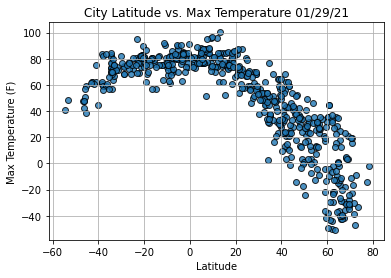

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

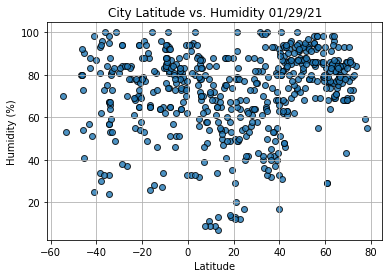

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

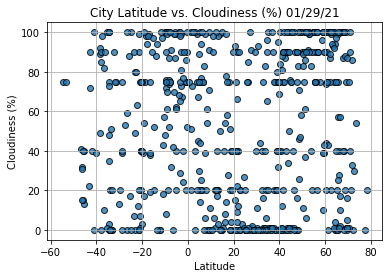

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

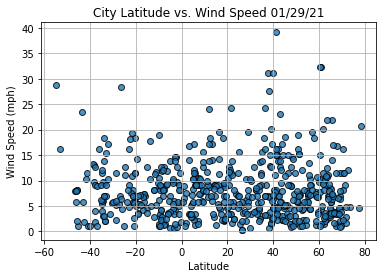

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
index13 = city_data_df.loc[13]
index13

City                        Kumba
Country                        CM
Date          2021-01-29 17:00:49
Lat                        4.6363
Lng                        9.4469
Max Temp                    83.95
Humidity                       59
Cloudiness                     89
Wind Speed                   5.37
Name: 13, dtype: object

In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Jamestown,US,2021-01-29 16:56:14,42.0970,-79.2353,21.00,86,90,16.11
3,San Patricio,US,2021-01-29 16:56:58,28.0170,-97.5169,69.80,64,1,10.36
5,Nanortalik,GL,2021-01-29 16:56:18,60.1432,-45.2371,35.40,83,100,9.66
9,Fortuna,US,2021-01-29 17:00:48,40.5982,-124.1573,39.99,100,1,8.05
13,Kumba,CM,2021-01-29 17:00:49,4.6363,9.4469,83.95,59,89,5.37


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

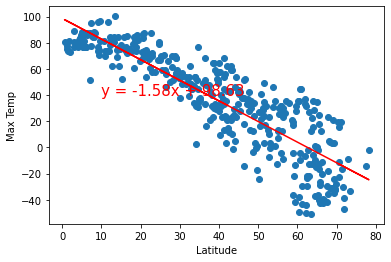

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

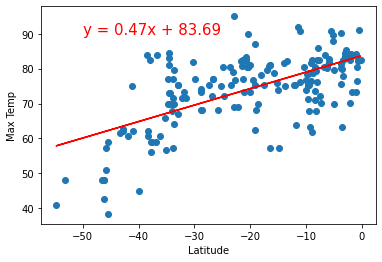

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

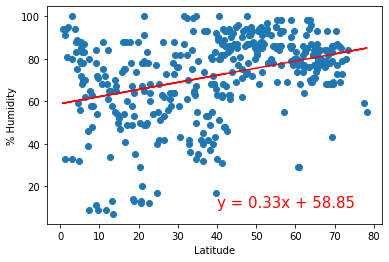

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

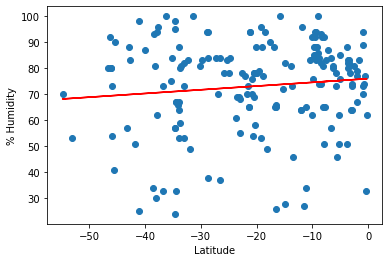

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

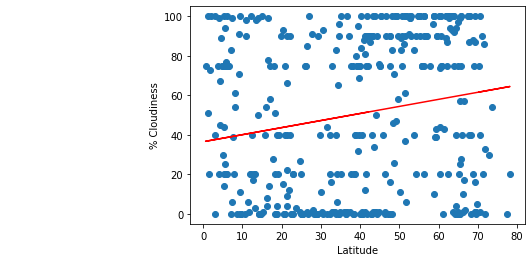

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(-50,60))

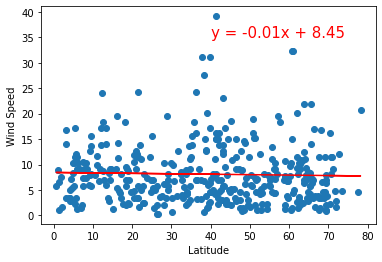

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

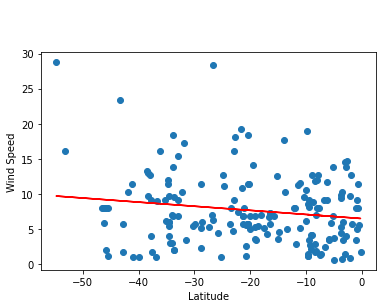

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))